## Market trend prediction by extrapolating time series data
* with the package prophet from facebook 
* Linear extrapolation

In [1]:
import pandas_datareader.data as web

import mplfinance as mpf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

from prophet import Prophet

import datetime 
import math

C:\Users\kevin\anaconda3\envs\python38_r411\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kevin\anaconda3\envs\python38_r411\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kevin\anaconda3\envs\python38_r411\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#define time line

start = datetime.datetime(2019, 1, 1)
startX = datetime.datetime(2021, 6, 1)
end = datetime.datetime(2021, 12, 26)
endX = datetime.datetime(2021, 12, 26)

#define source
source = "yahoo"

#define stocks
stocks = ["TMO", "GOOGL", "TSLA", "JNJ", "AAPL", "MSCI"]

In [4]:
all = web.DataReader(stocks, source, start, end)
TMO = web.DataReader("TMO", source, start, end)
GOOGL = web.DataReader("GOOGL", source, start, end)
TSLA = web.DataReader("TSLA", source, start, end)
JNJ = web.DataReader("JNJ", source, start, end)
AAPL = web.DataReader("AAPL", source, start, end)
MSCI = web.DataReader("MSCI", source, start, end) # na


## Logarithmic View and trend fit of degree 1 and 3/X

C:\Users\kevin\AppData\Local\Temp/ipykernel_18948/702112585.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.autofmt_xdate(rotation=45)


[243.60673591 243.79092203 243.97598569 244.16192687 244.34874557
 244.5364418  244.72501556 244.91446684 245.10479565 245.29600199
 245.48808585 245.68104723 245.87488615 246.06960259 246.26519655
 246.46166804 246.65901706 246.8572436  247.05634767 247.25632926
 247.45718838 247.65892503 247.8615392  248.0650309  248.26940013
 248.47464688 248.68077115 248.88777296 249.09565228 249.30440914
 249.51404352 249.72455543 249.93594486 250.14821182 250.3613563
 250.57537831 250.79027785 251.00605491 251.2227095  251.44024161
 251.65865125 251.87793842 252.09810311 252.31914533 252.54106507
 252.76386234 252.98753714 253.21208946 253.43751931 253.66382668
 253.89101158 254.11907401 254.34801396 254.57783144 254.80852644
 255.04009897 255.27254902 255.50587661 255.74008171 255.97516435
 256.21112451 256.44796219 256.6856774  256.92427014 257.1637404
 257.40408819 257.64531351 257.88741635 258.13039672 258.37425461
 258.61899003 258.86460297 259.11109344 259.35846144 259.60670696
 259.8558300

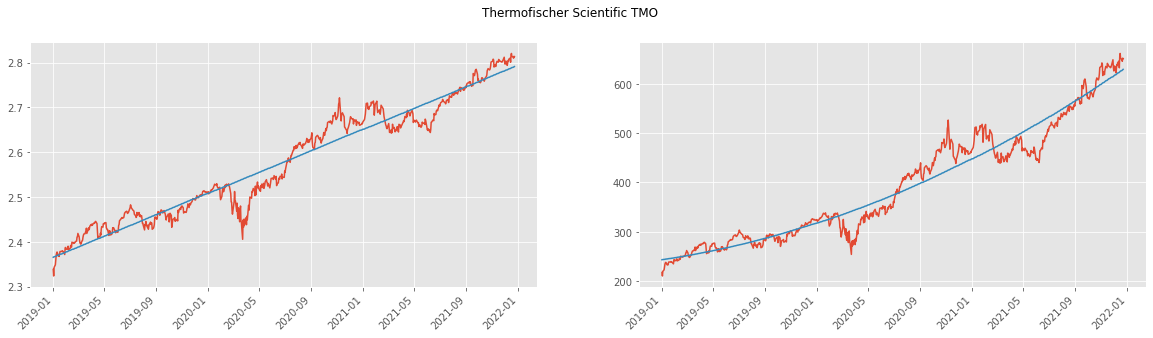

In [5]:

def log10er(stockX, title=" ", degree=3):

    fig, axs = plt.subplots(1,2, figsize=(20,5),  constrained_layout=True)

    fig.autofmt_xdate(rotation=45)
    fig.suptitle(title)

    lenDf  = np.arange(0, len(stockX["Adj Close"]))

    modLog = np.polyfit(y = stockX["Adj Close"].apply(math.log10), x = lenDf,  deg=1)
    mod    = np.polyfit(y = stockX["Adj Close"], x = lenDf,  deg=degree)

    predMaLog = np.poly1d(modLog)
    predMa = np.poly1d(mod)

    predLog = predMaLog(lenDf)
    pred = predMa(lenDf)

    print(pred)
    axs[0].plot(stockX["Adj Close"].apply(math.log10))
    axs[0].plot(stockX["Adj Close"].index, predLog)

    axs[1].plot(stockX["Adj Close"])
    axs[1].plot(stockX["Adj Close"].index, pred)

log10er(TMO, "Thermofischer Scientific TMO", np.e)

## Prediction by facebook prophet

In [ ]:
# Split data
TMO.reset_index(inplace=True)
TMO_ = TMO[["Date", "Adj Close"]]
TMO_ = TMO_.rename(columns={"Date":"ds", "Adj Close":"y"})

In [ ]:
half = len(TMO_["y"]) // 2
TMO_start = TMO_[["ds", "y"]][:half]
TMO_end = TMO_[["ds", "y"]][half:]

TMO_start

In [6]:
0.05 * 50000

2500.0

In [ ]:
# train the prophet mode

pro = Prophet()
pro.fit(TMO_start)

# create the future dates (periods = added dates)
dsFuture = pro.make_future_dataframe(periods=half)
pred = pro.predict(dsFuture)

In [52]:
#plot Prediction
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(pro, pred)


<AxesSubplot:xlabel='ds'>

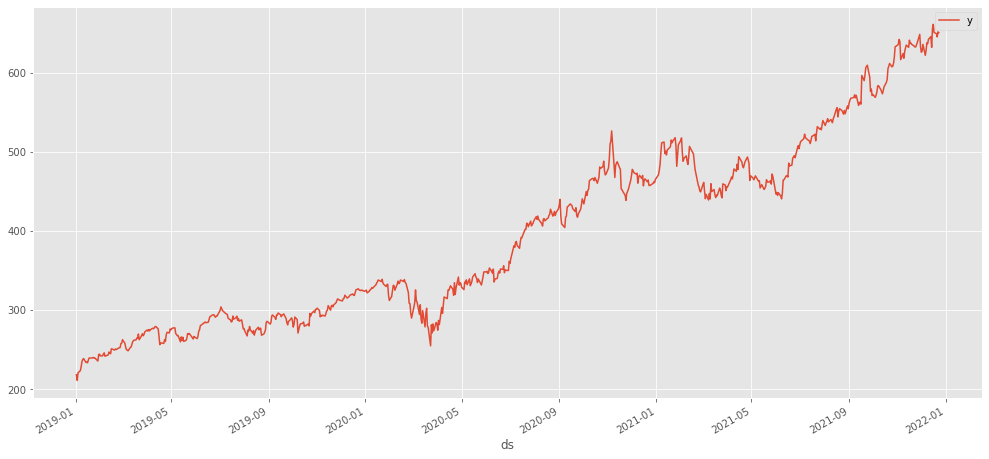

In [55]:
TMO_.plot(x="ds", y="y", figsize=(17,8))

In [51]:
plot_components_plotly(pro, pred)